# Stripper Foil Placement Comparison

This notebook compares the impact of different stripper foil locations on final ion beam intensities injected into the LHC.

## Background

### Stripper Foil Options:

1. **PS-SPS Stripping (Default)**:
   - Ions remain at LEIR charge state through PS
   - Stripping occurs before SPS injection in TT10 transfer line

2. **LEIR-PS Stripping (Alternative)**:
   - Stripping occurs after LEIR extraction
   - Higher charge state through PS and SPS
   - May lower space charge limit at PS injection but increases the limit at SPS injection

### Key Physics Considerations:
- **Space charge**: Scales as (charge)² / (mass × β³γ³)
- **Stripping efficiency**: Depends on ion energy and target material
- **Transmission**: Higher charge states may have different transmission rates

Let's systematically compare these two approaches:

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from pathlib import Path
import sys

# Add the parent directory to Python path to import injector_model
sys.path.append(str(Path.cwd().parent))
from injector_model import InjectorChain

# Set up matplotlib for nice plots
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "legend.fontsize": 10,
})

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 1. Create InjectorChain Instances for Both Scenarios

We'll create two identical setups, differing only in stripper foil placement:

In [2]:
# Scenario 1: PS-SPS stripping (default)
injector_ps_sps = InjectorChain(
    LEIR_bunches=2,
    PS_splitting=2,
    LEIR_PS_strip=False,  # PS-SPS stripping
    account_for_LEIR_ecooling=True,
    account_for_PS_rest_gas=True
)

# Scenario 2: LEIR-PS stripping
injector_leir_ps = InjectorChain(
    LEIR_bunches=2,
    PS_splitting=2,
    LEIR_PS_strip=True,   # LEIR-PS stripping
    account_for_LEIR_ecooling=True,
    account_for_PS_rest_gas=True
)

print("✓ Created InjectorChain instances:")
print(f"  1. PS-SPS stripping (LEIR_PS_strip=False)")
print(f"  2. LEIR-PS stripping (LEIR_PS_strip=True)")
print(f"\nBoth scenarios use:")
print(f"  - LEIR bunches: 2")
print(f"  - PS splitting: 2")
print(f"  - Electron cooling: enabled")
print(f"  - PS rest gas: enabled")

Initiated ion type: Pb
Q_LEIR = 54.0, Q_PS = 54.0, Q_SPS = 82.0 (fully stripped)
Strip LEIR-PS: False
E-cooling time w.r.t to Pb: 1.000

Initiated ion type: Pb
Q_LEIR = 54.0, Q_PS = 82.0, Q_SPS = 82.0 (fully stripped)
Strip LEIR-PS: True
E-cooling time w.r.t to Pb: 1.000

✓ Created InjectorChain instances:
  1. PS-SPS stripping (LEIR_PS_strip=False)
  2. LEIR-PS stripping (LEIR_PS_strip=True)

Both scenarios use:
  - LEIR bunches: 2
  - PS splitting: 2
  - Electron cooling: enabled
  - PS rest gas: enabled


## 2. Calculate Results for Both Scenarios

Let's calculate the bunch intensities and charge states for both stripping configurations:

In [3]:
# Calculate intensities for PS-SPS stripping
print("Calculating intensities for PS-SPS stripping...")
df_ps_sps = injector_ps_sps.calculate_LHC_bunch_intensity_all_ion_species(save_csv=False)

# Calculate intensities for LEIR-PS stripping  
print("Calculating intensities for LEIR-PS stripping...")
df_leir_ps = injector_leir_ps.calculate_LHC_bunch_intensity_all_ion_species(save_csv=False)

print(f"✓ Calculations completed for {len(df_ps_sps)} ion species")

# Display the ion species
ions = list(df_ps_sps.index)
print(f"\nIon species analyzed: {ions}")

Calculating intensities for PS-SPS stripping...
Initiated ion type: He
Q_LEIR = 1.0, Q_PS = 1.0, Q_SPS = 2.0 (fully stripped)
Strip LEIR-PS: False
E-cooling time w.r.t to Pb: 48.810

Ion type: He with Q_PS = 1.0
Account for rest gas in PS transmission: True, assume transmission = 0.7639097491244964 for cycle length: 1.2 s
Rounding number of LEIR injections DOWN, from 0.164!
Number of LEIR inejctions considering e-cooling: 1
SPS gamma0: 7.33600
Initiated ion type: O
Q_LEIR = 4.0, Q_PS = 4.0, Q_SPS = 8.0 (fully stripped)
Strip LEIR-PS: False
E-cooling time w.r.t to Pb: 11.320

Ion type: O with Q_PS = 4.0
Account for rest gas in PS transmission: True, assume transmission = 0.7269397232357733 for cycle length: 1.2 s
Rounding number of LEIR injections DOWN, from 0.707!
Number of LEIR inejctions considering e-cooling: 1
SPS gamma0: 7.33600
Initiated ion type: Mg
Q_LEIR = 7.0, Q_PS = 7.0, Q_SPS = 12.0 (fully stripped)
Strip LEIR-PS: False
E-cooling time w.r.t to Pb: 5.890

Ion type: Mg with Q

## 3. Compare Charge States

Let's first examine how the charge states differ between the two scenarios:

In [12]:
# Create comprehensive charge state comparison
charge_comparison = pd.DataFrame({
    'Ion': ions,
    'Mass_Number': df_ps_sps['massNumber'],
    'Atomic_Number': df_ps_sps['atomicNumber'],
    # PS-SPS stripping charges
    'LEIR_charge_PS_SPS': df_ps_sps['Q_LEIR'],
    'PS_charge_PS_SPS': df_ps_sps['Q_PS'],
    'SPS_charge_PS_SPS': df_ps_sps['Q_SPS'],
    # LEIR-PS stripping charges
    'LEIR_charge_LEIR_PS': df_leir_ps['Q_LEIR'],
    'PS_charge_LEIR_PS': df_leir_ps['Q_PS'],
    'SPS_charge_LEIR_PS': df_leir_ps['Q_SPS'],
})

print("Charge State Evolution Comparison:")
print("=" * 80)
print(f"{'Ion':<6} {'A':<3} {'Z':<3} {'PS-SPS Stripping':<20} {'LEIR-PS Stripping':<20}")
print(f"{'':6} {'':3} {'':3} {'LEIR→PS→SPS':<20} {'LEIR→PS→SPS':<20}")
print("-" * 80)

for _, row in charge_comparison.iterrows():
    ps_sps_evolution = f"{row['LEIR_charge_PS_SPS']:.0f}→{row['PS_charge_PS_SPS']:.0f}→{row['SPS_charge_PS_SPS']:.0f}"
    leir_ps_evolution = f"{row['LEIR_charge_LEIR_PS']:.0f}→{row['PS_charge_LEIR_PS']:.0f}→{row['SPS_charge_LEIR_PS']:.0f}"
    
    print(f"{row['Ion']:<6} {row['Mass_Number']:<3.0f} {row['Atomic_Number']:<3.0f} "
          f"{ps_sps_evolution:<20} {leir_ps_evolution:<20}")

print("\nKey charge state differences:")
print("   • PS-SPS: Lower charge in PS, higher in SPS after stripping")
print("   • LEIR-PS: Higher charge throughout PS and SPS")

Charge State Evolution Comparison:
Ion    A   Z   PS-SPS Stripping     LEIR-PS Stripping   
               LEIR→PS→SPS          LEIR→PS→SPS         
--------------------------------------------------------------------------------
He     4   2   1→1→2                1→2→2               
O      16  8   4→4→8                4→8→8               
Mg     24  12  7→7→12               7→12→12             
Ar     40  18  11→11→18             11→18→18            
Ca     40  20  17→17→20             17→20→20            
Kr     86  36  22→22→36             22→36→36            
In     115 49  37→37→49             37→49→49            
Xe     129 54  39→39→54             39→54→54            
Pb     208 82  54→54→82             54→82→82            

Key charge state differences:
   • PS-SPS: Lower charge in PS, higher in SPS after stripping
   • LEIR-PS: Higher charge throughout PS and SPS


## 3.5. Comparison with Reference Values

Let's create a comparison bar chart in the calculation script style:

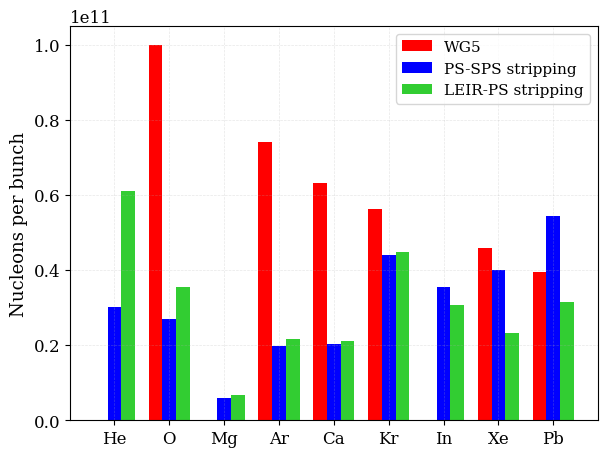

Comparison plot shows nucleons per bunch for different stripping configurations
Red: WG5 reference values
Blue: PS-SPS stripping (baseline)
Green: LEIR-PS stripping
   • Different space charge implications in each accelerator


In [11]:
# Load reference data for comparison
data_folder = Path.cwd().parent / 'data'
ref_Table_SPS = pd.read_csv(data_folder / 'test_and_benchmark_data' / 'SPS_final_intensities_WG5_and_Hannes.csv', index_col=0)

# Set up plotting parameters to match calculation script style
SMALL_SIZE = 11
MEDIUM_SIZE = 12  
BIGGER_SIZE = 13
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)

# Define bar width for bar plot
bar_width = 0.25
x = np.arange(len(ions))

# Create comparison plot: Nucleons per bunch with different stripping configurations
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
bar1 = ax.bar(x - bar_width, ref_Table_SPS['WG5 Intensity']*df_ps_sps['massNumber'], 
              bar_width, color='red', label='WG5')
bar2 = ax.bar(x, df_ps_sps['LHC_ionsPerBunch']*df_ps_sps['massNumber'], 
              bar_width, color='blue', label='PS-SPS stripping')
bar3 = ax.bar(x + bar_width, df_leir_ps['LHC_ionsPerBunch']*df_leir_ps['massNumber'], 
              bar_width, color='limegreen', label='LEIR-PS stripping')
ax.grid(alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_xticks(x)
ax.set_xticklabels(ions)
ax.set_ylabel("Nucleons per bunch")
ax.legend()
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

print("Comparison plot shows nucleons per bunch for different stripping configurations")
print("Red: WG5 reference values")
print("Blue: PS-SPS stripping (baseline)")
print("Green: LEIR-PS stripping")
print("   • Different space charge implications in each accelerator")

## 4. Compare Final Beam Intensities

Now let's compare the final LHC bunch intensities achieved with each stripping scheme:

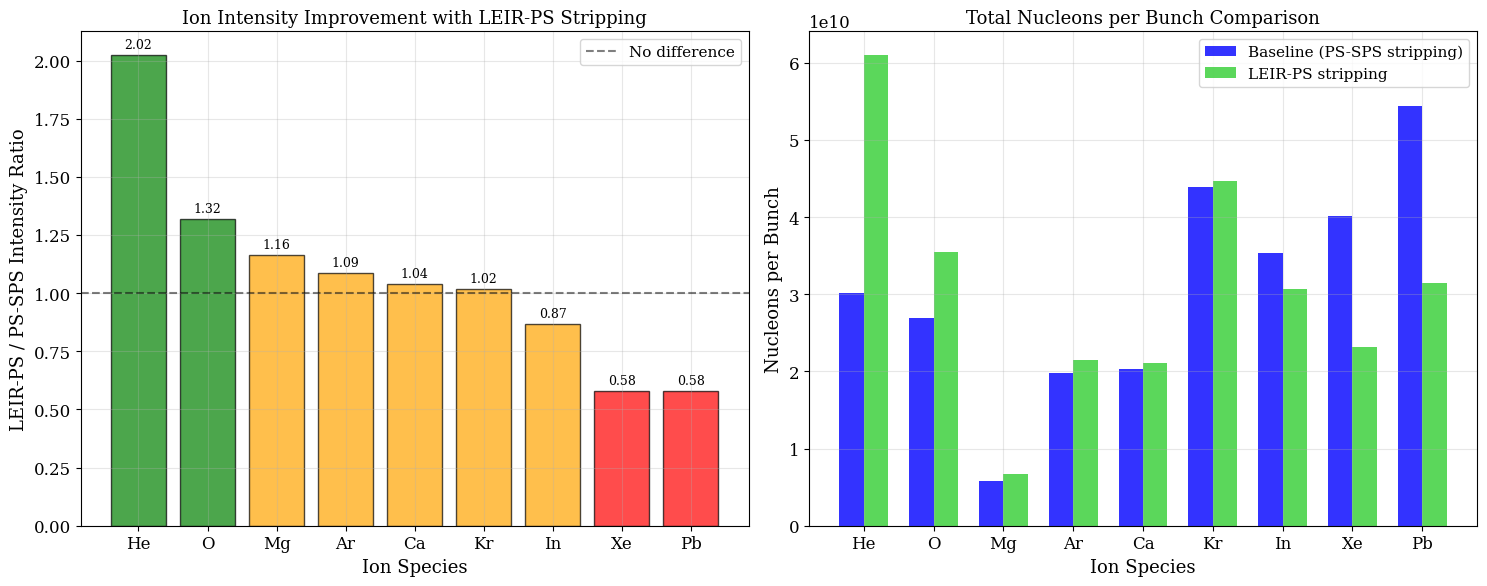

Intensity comparison completed:
Left plot: Improvement factor with LEIR-PS vs PS-SPS stripping
  - Green bars: LEIR-PS provides higher intensity (>20% improvement)
  - Orange bars: Similar performance (±20%)
  - Red bars: PS-SPS provides higher intensity
Right plot: Total nucleons per bunch for both scenarios
  - Blue bars: PS-SPS stripping (baseline)
  - Green bars: LEIR-PS stripping


In [19]:
# Create intensity comparison
intensity_comparison = pd.DataFrame({
    'Ion': ions,
    'Mass_Number': df_ps_sps['massNumber'],
    'Atomic_Number': df_ps_sps['atomicNumber'],
    # PS-SPS stripping intensities
    'LHC_ions_PS_SPS': df_ps_sps['LHC_ionsPerBunch'],
    'LHC_charges_PS_SPS': df_ps_sps['LHC_chargesPerBunch'],
    # LEIR-PS stripping intensities
    'LHC_ions_LEIR_PS': df_leir_ps['LHC_ionsPerBunch'],
    'LHC_charges_LEIR_PS': df_leir_ps['LHC_chargesPerBunch'],
})

# Calculate improvement factors
intensity_comparison['Ion_improvement_factor'] = (
    intensity_comparison['LHC_ions_LEIR_PS'] / intensity_comparison['LHC_ions_PS_SPS']
)

# Create focused comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

x_pos = np.arange(len(ions))
width = 0.35

# Plot 1: Intensity improvement factor with LEIR-PS stripping
colors = ['red' if x < 0.8 else 'orange' if x < 1.2 else 'green' 
          for x in intensity_comparison['Ion_improvement_factor']]
bars1 = ax1.bar(x_pos, intensity_comparison['Ion_improvement_factor'], 
                color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='No difference')
ax1.set_xlabel('Ion Species')
ax1.set_ylabel('LEIR-PS / PS-SPS Intensity Ratio')
ax1.set_title('Ion Intensity Improvement with LEIR-PS Stripping')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(ions)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Plot 2: Total nucleons per bunch comparison
nucleons_ps_sps = intensity_comparison['LHC_ions_PS_SPS'] * intensity_comparison['Mass_Number']
nucleons_leir_ps = intensity_comparison['LHC_ions_LEIR_PS'] * intensity_comparison['Mass_Number']

ax2.bar(x_pos - width/2, nucleons_ps_sps, width, 
        label='Baseline (PS-SPS stripping)', color='blue', alpha=0.8)
ax2.bar(x_pos + width/2, nucleons_leir_ps, width, 
        label='LEIR-PS stripping', color='limegreen', alpha=0.8)

ax2.set_xlabel('Ion Species')
ax2.set_ylabel('Nucleons per Bunch')
ax2.set_title('Total Nucleons per Bunch Comparison')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(ions)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Intensity comparison completed:")
print("Left plot: Improvement factor with LEIR-PS vs PS-SPS stripping")
print("  - Green bars: LEIR-PS provides higher intensity (>20% improvement)")
print("  - Orange bars: Similar performance (±20%)")
print("  - Red bars: PS-SPS provides higher intensity")
print("Right plot: Total nucleons per bunch for both scenarios")
print("  - Blue bars: PS-SPS stripping (baseline)")
print("  - Green bars: LEIR-PS stripping")

### Caveats
However, two aspects are worth keeping in mind:
1) the PS B-field at injection for He an O ions using LEIR-PS stripping may be too low, below the 0.0383 T limit
2) Additional emittance growth and momentum spread may be introduced 

## Summary

This notebook compared injected LHC bunch intensity depending on secondary stripper foil location: PS-SPS (baseline) or LEIR-PS (alternative)

#### Key Findings:

1. **Charge State Evolution**:
- **PS-SPS Stripping**: Lower charges in PS, optimized charges in SPS
- **LEIR-PS Stripping**: Higher charges throughout PS and SPS. Increases PS space charge effects (higher Q in PS), but also reduces space charge effects at SPS injection. SPS space charge depends on final charge states achieved.
- **Stripping Efficiency**: energy- and charge state-dependent stripping will affect LEIR-PS transmission.
- **PS transmission Effects**: stripping before the PS may reduce electron loss effects for partially stripped ions.